In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prince
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, hamming_loss


In [24]:
file_path = "../data/plant_health_data.csv"
# Charger le fichier CSV
df = pd.read_csv(file_path, sep=',', header=0)

df.head()



,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress


In [16]:
# Supprimer les colonnes inutiles
df = df.drop(columns=["Timestamp", "Plant_ID"])

# Encoder la variable cible
label_encoder = LabelEncoder()
df["Plant_Health_Status"] = label_encoder.fit_transform(df["Plant_Health_Status"])

# Séparer les features (X) et la variable cible (y)
X = df.drop(columns=["Plant_Health_Status"])
y = df["Plant_Health_Status"]

# Normaliser les features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparer les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Liste des modèles à tester
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42)),
    "SVM": OneVsRestClassifier(SVC(probability=True, random_state=42)),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Évaluer chaque modèle
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    hamming = hamming_loss(y_test, y_pred)
    
    results[name] = {"Accuracy": accuracy, "F1 Score": f1, "Hamming Loss": hamming}
    
    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Hamming Loss: {hamming:.4f}")

# Comparaison des résultats
df_results = pd.DataFrame(results).T
print("\nRésultats des modèles:")
print(df_results)



Random Forest - Accuracy: 0.9958, F1 Score: 0.9958, Hamming Loss: 0.0042
Logistic Regression - Accuracy: 0.7167, F1 Score: 0.6968, Hamming Loss: 0.2833
SVM - Accuracy: 0.8250, F1 Score: 0.8188, Hamming Loss: 0.1750
KNN - Accuracy: 0.6958, F1 Score: 0.6886, Hamming Loss: 0.3042
MLP Classifier - Accuracy: 0.8958, F1 Score: 0.8942, Hamming Loss: 0.1042

Résultats des modèles:
                     Accuracy  F1 Score  Hamming Loss
Random Forest        0.995833  0.995833      0.004167
Logistic Regression  0.716667  0.696810      0.283333
SVM                  0.825000  0.818781      0.175000
KNN                  0.695833  0.688647      0.304167
MLP Classifier       0.895833  0.894178      0.104167


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ACP pour visualiser les variables qui drivent

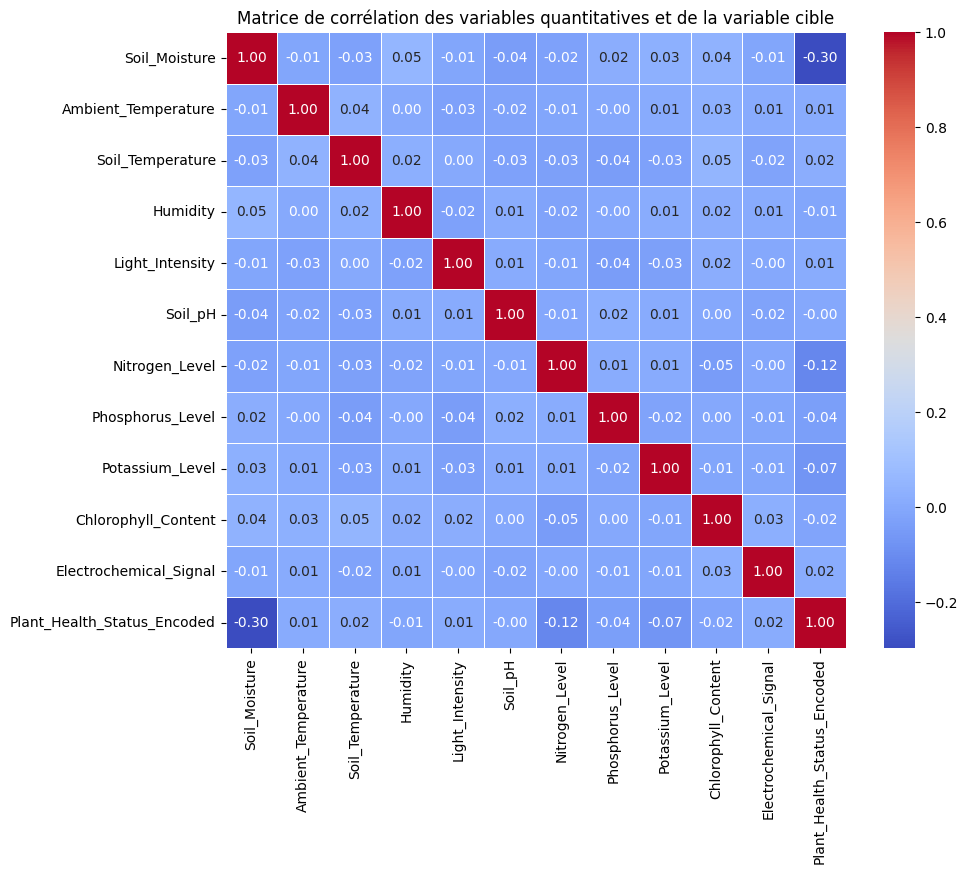

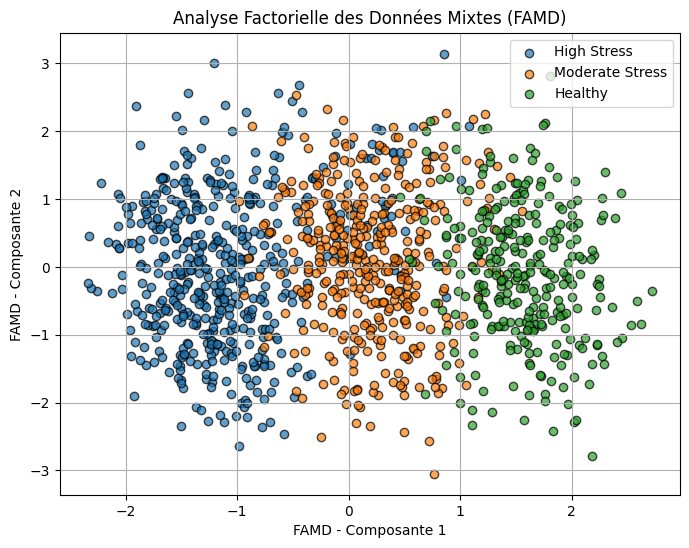

In [32]:
columns_quant = [
    "Soil_Moisture", "Ambient_Temperature", "Soil_Temperature", "Humidity", "Light_Intensity",
    "Soil_pH", "Nitrogen_Level", "Phosphorus_Level", "Potassium_Level",
    "Chlorophyll_Content", "Electrochemical_Signal"
]  # Variables quantitatives

column_qual = ["Plant_Health_Status"]  # Variable qualitative

# Vérifier que les colonnes existent et ne contiennent pas de valeurs manquantes
df = df[columns_quant + column_qual].dropna()

# Encodage de la variable qualitative pour la corrélation
le = LabelEncoder()
df["Plant_Health_Status_Encoded"] = le.fit_transform(df["Plant_Health_Status"])

# Matrice de corrélation
plt.figure(figsize=(10, 8))
corr_matrix = df[columns_quant + ["Plant_Health_Status_Encoded"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des variables quantitatives et de la variable cible")
plt.show()

# Analyse Factorielle des Données Mixtes (FAMD)
famd = prince.FAMD(n_components=2, random_state=42)
famd = famd.fit(df[columns_quant + column_qual])

# Récupérer les coordonnées des individus
df_famd = famd.row_coordinates(df)

# Ajouter les étiquettes de classe pour la couleur
df_famd["Plant_Health_Status"] = df["Plant_Health_Status"].values

# Visualisation
plt.figure(figsize=(8,6))
for category in df_famd["Plant_Health_Status"].unique():
    subset = df_famd[df_famd["Plant_Health_Status"] == category]
    plt.scatter(subset[0], subset[1], label=category, alpha=0.7, edgecolors='k')

plt.xlabel("FAMD - Composante 1")
plt.ylabel("FAMD - Composante 2")
plt.title("Analyse Factorielle des Données Mixtes (FAMD)")
plt.legend()
plt.grid()
plt.show()